In [1]:
# question: can motion correction be undone?
# plan
# get simulated data, som image points
# move toflor back and forth

In [11]:
import numpy as np
import representation
import listmode
import kex_headers
import matplotlib.pyplot as plt
import importlib
importlib.reload(listmode)

<module 'listmode' from 'C:\\Users\\petct\\Desktop\\Hugo\\Code\\PythonMEX\\listmode.py'>

In [255]:
tof = 0
mi = 200
meshes = np.mgrid[tof:tof+1, mi:mi+1, 5:168:2, 100:300:4]
testpoints = [mesh.flatten() for mesh in meshes]
print(meshes[0].shape)
print(np.array(testpoints).shape)

(1, 1, 82, 50)
(4, 4100)


In [256]:
def get_sinogram(toflor, show=True):
    sinogram= listmode.get_histogram(toflor, 
                                 kex_headers.HISTOGRAM_SHAPE,
                                 dtype=np.uint16)
    if show:
        plt.figure(figsize=(10,5))
        plt.imshow(sinogram[tof,mi])
        plt.colorbar()
        print("count", np.sum(sinogram))
    return sinogram

count 4100


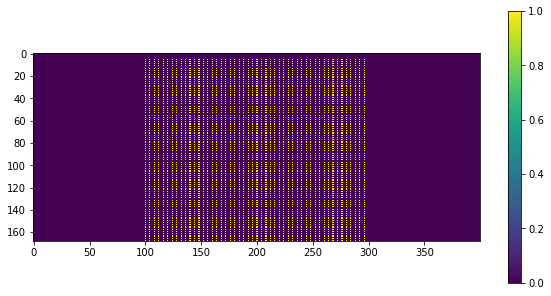

In [257]:
sinogram = get_sinogram(testpoints)

In [258]:
translation = np.array([10,30,0])
moved_toflor, is_fov = representation.move_translation(np.array(testpoints), translation)
print(np.sum(is_fov) / len(is_fov))

0.7880487804878049


count 3231


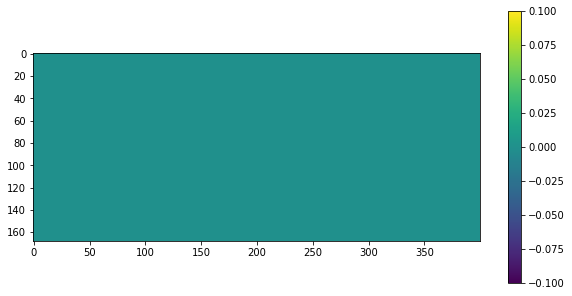

In [259]:
moved_sinogram= get_sinogram(moved_toflor[:, is_fov])

In [260]:
reverse_moved_toflor, is_fov2 = representation.move_translation(moved_toflor[:, is_fov], -1*translation)

count 3231


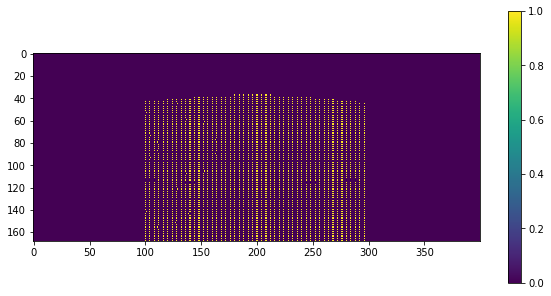

In [261]:
cycled_sinogram= get_sinogram(reverse_moved_toflor[:, is_fov2])

In [247]:
diff = sinogram[tof,mi].astype(int)-cycled_sinogram[tof,mi].astype(int)
print(np.sum(np.abs(diff)))

4100
